Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


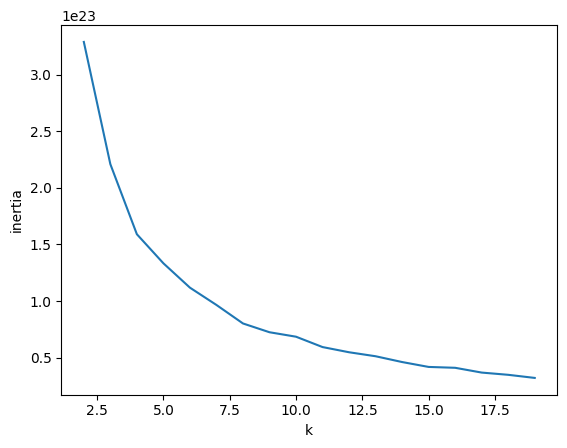

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 데이터 프레임 불러오기
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/input_C.csv'
dfC = pd.read_csv(filepath, header=0)

# k 평균으로 2~19개의 클러스터링을 수행하여 inertia 값을 계산하여 리스트에 저장
inertia = []
for k in range(2, 20):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(dfC.iloc[:, 2:])
    inertia.append(km.inertia_)

# inertia 값을 그래프로 그리기
plt.plot(range(2, 20), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()


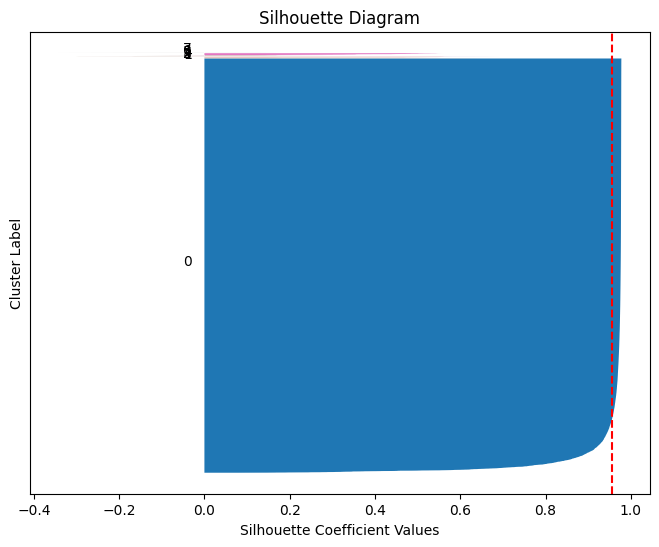

In [61]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# 데이터 프레임 불러오기
filepath = '/content/drive/My Drive/input_C.csv'
dfC = pd.read_csv(filepath)

# 첫번째 행과열 이후부터의 데이터로 k 평균으로 2개의 군집 만들기
km = KMeans(n_clusters=8)
km.fit(dfC.iloc[1:, 2:])

# 실루엣 다이어그램 생성
X = dfC.iloc[1:, 2:]
silhouette_vals = silhouette_samples(X, km.labels_)
silhouette_avg = silhouette_score(X, km.labels_)

y_lower = 10
fig, ax = plt.subplots(figsize=(8,6))
for i in range(8):
    ith_cluster_silhouette_vals = silhouette_vals[km.labels_ == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette Diagram")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
plt.show()


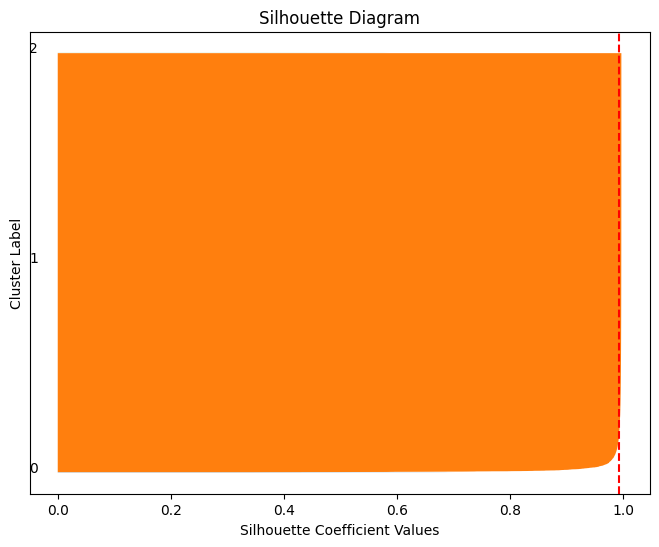

In [60]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# 데이터 프레임 불러오기
filepath = '/content/drive/My Drive/input_C.csv'
dfC = pd.read_csv(filepath)

# 첫번째 행과열 이후부터의 데이터로 k 평균으로 2개의 군집 만들기
km = KMeans(n_clusters=3)
km.fit(dfC.iloc[1:, 2:])

# 실루엣 다이어그램 생성
X = dfC.iloc[1:, 2:]
silhouette_vals = silhouette_samples(X, km.labels_)
silhouette_avg = silhouette_score(X, km.labels_)

y_lower = 10
fig, ax = plt.subplots(figsize=(8,6))
for i in range(3):
    ith_cluster_silhouette_vals = silhouette_vals[km.labels_ == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette Diagram")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
plt.show()

Estimated number of clusters: 0


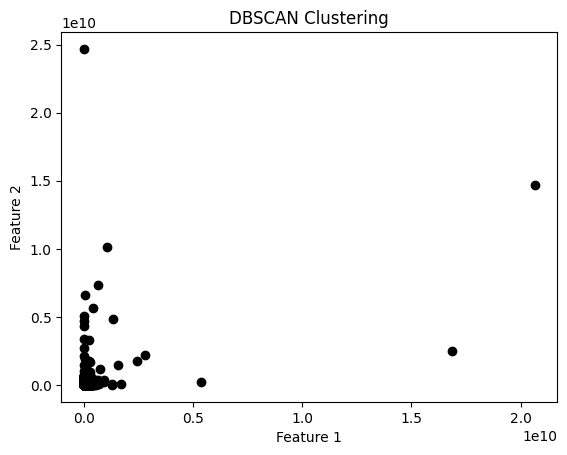

In [62]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# 데이터 프레임 불러오기
filepath = '/content/drive/My Drive/input_C.csv'
dfC = pd.read_csv(filepath)

# DBSCAN으로 클러스터링하기
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(dfC.iloc[1:, 2:])

# 군집 개수
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print('Estimated number of clusters: %d' % n_clusters_)

# 시각화를 위한 산점도 그리기
X = dfC.iloc[1:, 2:]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for i, label in enumerate(set(dbscan.labels_)):
    if label == -1:
        # 노이즈는 검은색으로
        color = 'k'
    else:
        color = colors[i % len(colors)]
    # 해당 군집에 속하는 데이터 포인트 추출
    idx = np.where(dbscan.labels_ == label)[0]
    cluster_points = X.iloc[idx, :]
    # 해당 군집의 데이터 포인트를 산점도에 그리기
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], c=color)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
